In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets

from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# load data
iris = datasets.load_iris()
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


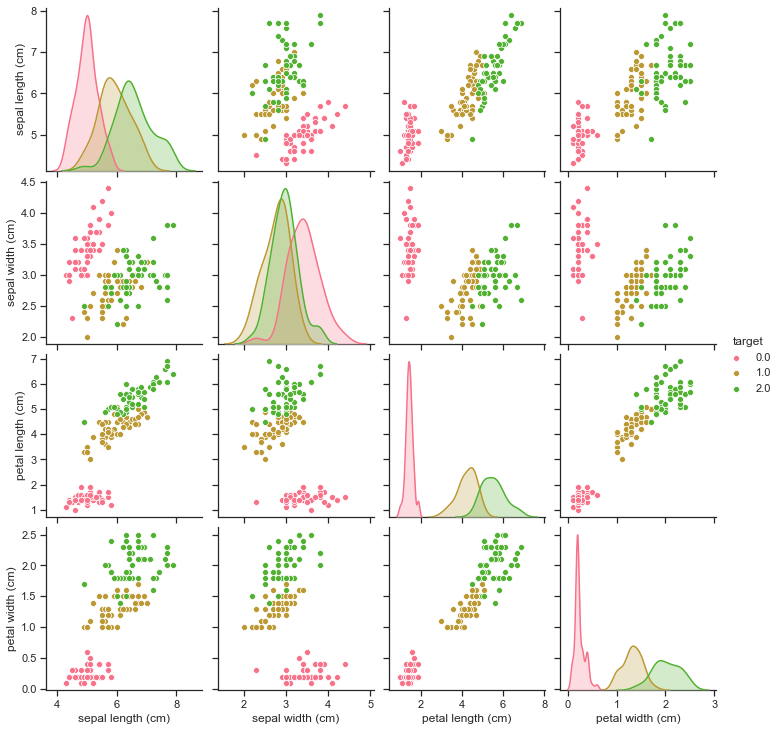

In [3]:
def visualize_data(dataset):
    sns.set(style="ticks")
    sns.set_palette("husl")
    sns.pairplot(dataset.iloc[:,0:5], hue="target")
    
visualize_data(dataset)

In [4]:
def transform_data(dataset, mode= "keras"):
    #get values to X and labels to Y
    X_values = dataset.iloc[:,0:4].values
    Y_values = dataset.iloc[:,4].values

    # scale values 
    sc = StandardScaler() 
    x = sc.fit_transform(X_values) 

    # Encode labels
    encoder = LabelEncoder() 
    y = encoder.fit_transform(Y_values)
    if mode == "keras":    
        y = pd.get_dummies(y).values
    return x, y

def prepere_and_train_model_sequential_2_layers(X_train, Y_train, epochs=100):
    model = Sequential()

    model.add(Dense(4, input_shape=(4,), activation="relu"))
    model.add(Dense(3, activation="softmax"))

    model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    
    model.fit(X_train,Y_train,epochs=epochs,verbose=0)
    return model

def test_model_sequential(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    y_test_class = np.argmax(Y_test, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    print("\n\n TEST MODEL\n\n")
    print(classification_report(y_test_class, y_pred_class))
    # print(confusion_matrix(y_test_class, y_pred_class))

In [5]:
x, y = transform_data(dataset)

# split data into train and test data 80/20
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [6]:
train_model_2_layers = prepere_and_train_model_sequential_2_layers(X_train, Y_train, 100)
test_model_sequential(train_model_2_layers, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


 TEST MODEL


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
def prepere_and_train_model_sequential_3_layers(X_train, Y_train, epochs=100):
    model = Sequential()

    model.add(Dense(4, input_shape=(4,), activation="tanh"))
    model.add(Dense(3, activation="softmax"))
    model.add(Dense(3, activation="softmax"))

    model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    model.fit(X_train,Y_train,epochs=100,verbose=0)
    return model

train_model_3_layers = prepere_and_train_model_sequential_3_layers(X_train, Y_train, 100)
test_model_sequential(train_model_3_layers, X_test, Y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


 TEST MODEL


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00   

In [8]:
def prepere_and_train_model_sequential_4_layers(X_train, Y_train, epochs=100):
    model = Sequential()

    model.add(Dense(30, input_shape=(4,), activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(5, activation="relu"))
    model.add(Dense(3, activation="softmax"))

    model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    model.fit(X_train,Y_train,epochs=100,verbose=0)
    return model

train_model_4_layers = prepere_and_train_model_sequential_4_layers(X_train, Y_train, 100)
test_model_sequential(train_model_4_layers, X_test, Y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                150       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 18        
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


 TEST MODEL


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy        

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

#DATA TRANSFORMAION TOOLS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#SCIKIT LEARN CLASSIFIERS
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def scikit_model():
    models = []
    models.append(('SVM', SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)))
    models.append(('SVM Linear', SVC(kernel="linear", C=0.025)))
    models.append(('KNN=3', KNeighborsClassifier(3)))
    models.append(('KNN=5', KNeighborsClassifier(3)))
    models.append(('Gaussian', GaussianProcessClassifier(1.0 * RBF(1.0))))
    models.append(('DTREE', DecisionTreeClassifier(max_depth=5)))
    models.append(('RANDOM FOREST', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)))
    models.append(('MLP', MLPClassifier(alpha=1, max_iter=1000)))
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('NAIVE BAYES', GaussianNB()))
#     models.append(('DISCRIMINANT', QuadraticDiscriminantAnalysis()))
    return models

def train_scikit(models, X, Y):
    for name,model in models:
        X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
        model.fit(X_train, y_train)
        
        print('\n\n %s' % name)
        print('The accuracy of the {} classifier on training data is {:.2f}'.format(name, model.score(X_train, y_train)))
        print('The accuracy of the {} classifier on test data is {:.2f}'.format(name, model.score(X_test, y_test)))

#SCIKIT
train_scikit(scikit_model(), *transform_data(dataset, "scikit"))



 SVM
The accuracy of the SVM classifier on training data is 0.97
The accuracy of the SVM classifier on test data is 1.00


 SVM Linear
The accuracy of the SVM Linear classifier on training data is 0.93
The accuracy of the SVM Linear classifier on test data is 0.87


 KNN=3
The accuracy of the KNN=3 classifier on training data is 0.97
The accuracy of the KNN=3 classifier on test data is 0.97


 KNN=5
The accuracy of the KNN=5 classifier on training data is 0.97
The accuracy of the KNN=5 classifier on test data is 0.97


 Gaussian
The accuracy of the Gaussian classifier on training data is 0.98
The accuracy of the Gaussian classifier on test data is 1.00


 DTREE
The accuracy of the DTREE classifier on training data is 1.00
The accuracy of the DTREE classifier on test data is 1.00


 RANDOM FOREST
The accuracy of the RANDOM FOREST classifier on training data is 0.99
The accuracy of the RANDOM FOREST classifier on test data is 0.97


 MLP
The accuracy of the MLP classifier on training d